### 서버 접속

- 서버에서 jupyter lab 실행
- 로컬 브라우저에서 <jupyter server>:8888 접속
- 암호 1 입력

##### 기름 유출 데이터

```
단일값만 있는 특성
 - 22번
```

In [1]:
from pandas import read_csv

# 기름 유출 데이터
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# 데이터 세트 로드
df = read_csv(path, header=None)

# 각 특성의 고유값 개수 확인
print(df.nunique())

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64


##### 기름 유출 데이터

```
단일값만 있는 특성 제거
 - 22번
```

In [2]:
from pandas import read_csv

# 기름 유출 데이터
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# 데이터 세트 로드
df = read_csv(path, header=None)

# 데이터 개수와 특성 크기
print(df.shape)

# 각 특성의 고유값 개수
counts = df.nunique()

# 고유값이 1개인 특성 확인
to_del = [column for column, value in enumerate(counts) if 1 == value]
print(to_del)

# 고유값이 1개인 특성 제거
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

(937, 50)
[22]
(937, 49)


##### 기름 유출 데이터

```
고유값이 거의 없는 특성
 - 11개
```

In [3]:
from pandas import read_csv

# 기름 유출 데이터
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# 데이터 세트 로드
df = read_csv(path, header=None)

# 각 특성의 고유값 개수
counts = df.nunique()

# 각 특성의 고유값 비율
for column in range(df.shape[1]):
	num = counts[column]
	percentage = float(num) / df.shape[0] * 100

	if percentage < 1:
		print('%d, %d, %.1f%%' % (column, num, percentage))

21, 9, 1.0%
22, 1, 0.1%
24, 9, 1.0%
25, 8, 0.9%
26, 9, 1.0%
32, 4, 0.4%
36, 3, 0.3%
38, 9, 1.0%
39, 9, 1.0%
45, 2, 0.2%
49, 2, 0.2%


##### 기름 유출 데이터

```
고유값이 거의 없는 특성 제거
 - 11개
```

In [4]:
from pandas import read_csv

# 기름 유출 데이터
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# 데이터 세트 로드
df = read_csv(path, header=None)

# 데이터 개수와 특성 크기
print(df.shape)

# 각 특성의 고유값 개수
counts = df.nunique()

# 고유값 비율이 1% 미만인 특성 확인
to_del = [column for column, value in enumerate(counts) if (float(value) / df.shape[0] * 100) < 1]
print(to_del)

# 고유값 비율이 1% 미만인 특성 제거
df.drop(to_del, axis=1, inplace=True)
print(df.shape)

(937, 50)
[21, 22, 24, 25, 26, 32, 36, 38, 39, 45, 49]
(937, 39)


#### 기름 유출 데이터

```
분산이 0인 특성 제거
```

In [4]:
from numpy import arange
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot

# 기름 유출 데이터
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# 데이터 세트 로드
df = read_csv(path, header=None)

# 데이터 분할
data = df.values
X = data[:, :-1]
#y = data[:, -1]
# 데이터 특성 개수
print(X.shape[1])

# 분산을 기본값인 0으로 설정
transform = VarianceThreshold()

# 분산이 0인 특성 제거
X_sel = transform.fit_transform(X)
# 변환된 데이터 특성 개수
print(X_sel.shape[1])

49
48


#### 기름 유출 데이터

```
분산이 낮은 특성 확인
 - 14개
```

>Threshold=0.00, Features=48
>Threshold=0.05, Features=37
>Threshold=0.10, Features=36
>Threshold=0.15, Features=35
>Threshold=0.20, Features=35
>Threshold=0.25, Features=35
>Threshold=0.30, Features=35
>Threshold=0.35, Features=35
>Threshold=0.40, Features=35
>Threshold=0.45, Features=33
>Threshold=0.50, Features=31


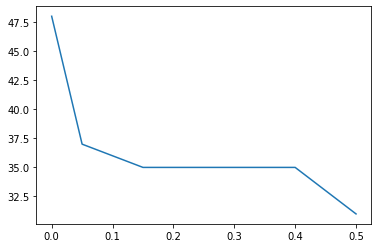

In [9]:
from numpy import arange
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot

# 기름 유출 데이터
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/oil-spill.csv'
# 데이터 세트 로드
df = read_csv(path, header=None)

# 데이터 분할
data = df.values
X = data[:, :-1]
#y = data[:, -1]

# 분산의 임계값들 (0.0부터 0.5까지 총 11개)
thresholds = arange(0.0, 0.55, 0.05)

# 결과 저장 
results = list()

for threshold in thresholds:
	# 분산 설정 (0.0부터 0.05 증가하여 0.5까지)
	transform = VarianceThreshold(threshold=threshold)
	# 설정된 분산 이하의 특성 제거
	X_sel = transform.fit_transform(X)
	# 설정된 분산보다 큰 특성의 개수
	n_features = X_sel.shape[1]
	print('>Threshold=%.2f, Features=%d' % (threshold, n_features))
	# 결과 저장
	results.append(n_features)

# 분산의 임계값과 설정된 분산보다 큰 특성의 개수
pyplot.plot(thresholds, results)
pyplot.show()

#### 당뇨병 데이터

```
분산이 낮은 특성 확인
 - 2개
```

In [19]:
from numpy import arange
from pandas import read_csv
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot

# 당뇨병 데이터
path = 'https://raw.githubusercontent.com/MausamGaurav/AutomatedFeatureSelection/master/diabetes.csv'
# 데이터 세트 로드)
df = read_csv(path, header=None)

# 데이터 분할
data = df.values
X = data[:, :-1]
#y = data[:, -1]

# 분산의 임계값들 (0.0부터 0.5까지 총 11개)
thresholds = arange(0.0, 0.55, 0.05)

# 결과 저장 
results = list()

for threshold in thresholds:
	# 분산 설정 (0.0부터 0.05 증가하여 0.5까지)
	transform = VarianceThreshold(threshold=threshold)
	# 설정된 분산 이하의 특성
	X_sel = transform.fit(X)
	# 설정된 분산보다 큰 특성의 개수
	column = X_sel.get_support(indices=True)
	print('>Threshold=%.2f, Features=' % (threshold), column)


>Threshold=0.00, Features= [0 1 2 3 4 5 6 7]
>Threshold=0.05, Features= [0 1 2 3 4 5 6 7]
>Threshold=0.10, Features= [0 1 2 3 4 5 6 7]
>Threshold=0.15, Features= [0 1 2 3 4 5 7]
>Threshold=0.20, Features= [0 1 2 3 4 5 7]
>Threshold=0.25, Features= [0 1 2 3 4 5 7]
>Threshold=0.30, Features= [0 1 2 3 4 5 7]
>Threshold=0.35, Features= [0 1 2 3 4 5 7]
>Threshold=0.40, Features= [0 1 2 3 4 5 7]
>Threshold=0.45, Features= [0 1 2 3 4 5 7]
>Threshold=0.50, Features= [0 1 2 3 4 5 7]


#### 붓꽃 데이터

```
중복값이 있는 특성 확인
 - 34, 37, 142번
```

In [7]:
from pandas import read_csv

# 붓꽃 데이터
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
# 데이터 세트 로드
df = read_csv(path, header=None)

# 중복값 확인
dups = df.duplicated()
# 중복값이 하나라도 있으면 True, 그렇지 않으면 False 
print(dups.any())

# 중복값이 있는 데이터
print(df[dups])

True
       0    1    2    3               4
34   4.9  3.1  1.5  0.1     Iris-setosa
37   4.9  3.1  1.5  0.1     Iris-setosa
142  5.8  2.7  5.1  1.9  Iris-virginica


#### 붓꽃 데이터

```
중복값이 있는 특성 제거
 - 34, 37, 142번
```

In [6]:
from pandas import read_csv

# 붓꽃 데이터
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
# 데이터 세트 로드
df = read_csv(path, header=None)
print(df.shape[0])

# 중복값 제거
df.drop_duplicates(inplace=True)
print(df.shape[0])

150
147
